# Importing Packages

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
animal_images = len(os.listdir('/content/Dataset/animal'))
nature_images = len(os.listdir('/content/Dataset/nature'))
selfie_images = len(os.listdir('/content/Dataset/selfie'))
vihecle_images = len(os.listdir('/content/Dataset/vihecle'))

print("animal_images: {}".format(animal_images))
print('--------------------------------------------')
print("nature_images: {}".format(nature_images))
print('--------------------------------------------')
print("selfie_images: {}".format(selfie_images))
print('--------------------------------------------')
print("vihecle_images: {}".format(vihecle_images))

animal_images: 3055
--------------------------------------------
nature_images: 4404
--------------------------------------------
selfie_images: 3380
--------------------------------------------
vihecle_images: 3172


# How Data Looks

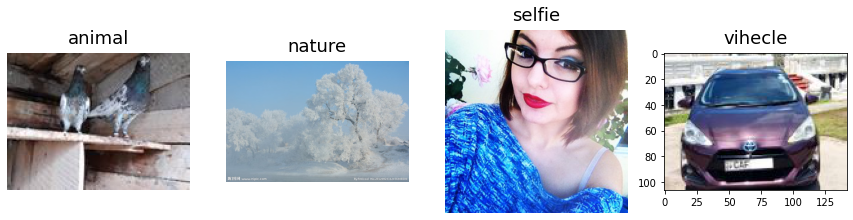

In [ ]:
dataset='/content'
train_folder = os.path.join(dataset,"Dataset")


images = []


for data_folder in sorted(os.listdir(train_folder)):
    images = os.listdir(train_folder + '/' + data_folder)
    images_selected = np.random.choice(images)
    images.append(os.path.join(train_folder,data_folder,images_selected))
                                     
fig=plt.figure(1, figsize=(15, 10))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    plt.axis('off')
    fig=plt.subplot(3, 5, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

# Image Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                  rescale= 1./255,
                                  validation_split=0.30,
                                  rotation_range=5, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  zoom_range=0.1)

train_path='/content/Dataset'

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        color_mode='rgb',
        batch_size=32,
        shuffle = True,
        seed = 42,
        subset='training',
        class_mode = "categorical",
        classes = ['animal','nature','selfie','vihecle'])

test_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        color_mode='rgb',
        seed = 42,
        shuffle = False,
        batch_size=32,
        subset='validation',
        class_mode = "categorical",
        classes = ['animal','nature','selfie','vihecle'])

Found 9809 images belonging to 4 classes.
Found 4202 images belonging to 4 classes.


# After Preprocessing

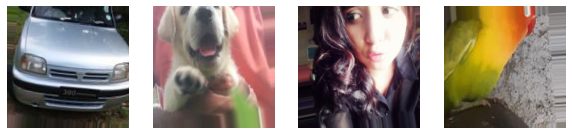

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))

for i in range(4):
  image = next(train_set)[0]
  image = np.squeeze(image)
  ax[i].imshow(image)
  ax[i].axis('off')

# Model Building

# VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Model

In [ ]:
vgg = VGG16(input_shape= (224,224,3), weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
vgg_history = model.fit(train_set,
                           epochs=20,
                           validation_data = test_set,
                           steps_per_epoch=(len(train_set.labels)/32) ,
                            validation_steps=(len(test_set.labels)/32))

Epoch 1/20
306/306 [==============================] - 191s 621ms/step - loss: 0.4950 - accuracy: 0.8220 - val_loss: 0.4037 - val_accuracy: 0.8674
Epoch 2/20
306/306 [==============================] - 184s 600ms/step - loss: 0.2117 - accuracy: 0.9307 - val_loss: 0.3748 - val_accuracy: 0.8836
Epoch 3/20
306/306 [==============================] - 183s 596ms/step - loss: 0.1830 - accuracy: 0.9414 - val_loss: 0.5855 - val_accuracy: 0.8429
Epoch 4/20
306/306 [==============================] - 183s 598ms/step - loss: 0.1593 - accuracy: 0.9483 - val_loss: 0.2333 - val_accuracy: 0.9272
Epoch 5/20
306/306 [==============================] - 183s 598ms/step - loss: 0.1374 - accuracy: 0.9547 - val_loss: 0.2316 - val_accuracy: 0.9312
Epoch 6/20
306/306 [==============================] - 184s 600ms/step - loss: 0.1148 - accuracy: 0.9628 - val_loss: 0.3390 - val_accuracy: 0.9003
Epoch 7/20
306/306 [==============================] - 193s 629ms/step - loss: 0.1186 - accuracy: 0.9625 - val_loss: 0.3334 -

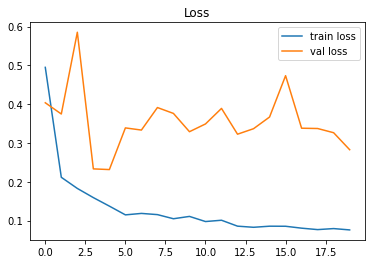

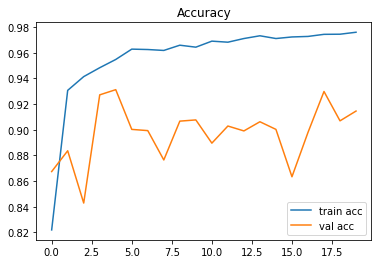

In [ ]:
plt.plot(vgg_history.history['loss'], label='train loss')
plt.plot(vgg_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(vgg_history.history['accuracy'], label='train acc')
plt.plot(vgg_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

# Evaluation

In [ ]:
vgg_evaluate = model.evaluate(test_set)

132/132 [==============================] - 57s 430ms/step - loss: 0.2757 - accuracy: 0.9148


In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)

test_labels = test_set.labels

In [ ]:
test_set.class_indices

{'animal': 0, 'nature': 1, 'selfie': 2, 'vihecle': 3}

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

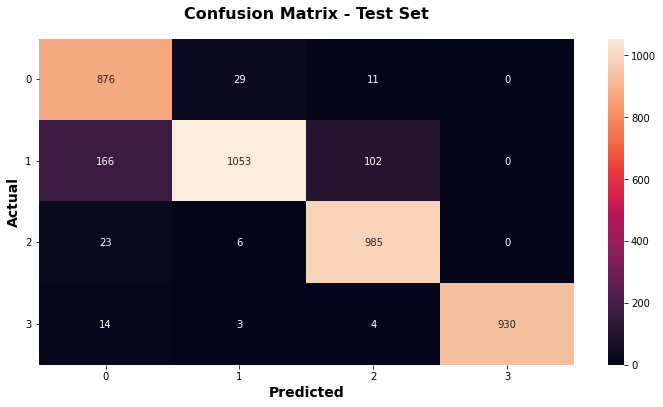

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       916
           1       0.97      0.80      0.87      1321
           2       0.89      0.97      0.93      1014
           3       1.00      0.98      0.99       951

    accuracy                           0.91      4202
   macro avg       0.92      0.93      0.92      4202
weighted avg       0.92      0.91      0.91      4202



# Custom CNN

In [ ]:
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
model = Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',strides=2 ,input_shape=(224,224,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=2))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4,'softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 111, 111, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        36896     
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                  

In [ ]:
cnn_history = model.fit(train_set,epochs=10,validation_data=test_set)

Epoch 1/10
307/307 [==============================] - 173s 556ms/step - loss: 1.0241 - accuracy: 0.5586 - val_loss: 1.1055 - val_accuracy: 0.5809
Epoch 2/10
307/307 [==============================] - 165s 537ms/step - loss: 0.6497 - accuracy: 0.7633 - val_loss: 0.9430 - val_accuracy: 0.7001
Epoch 3/10
307/307 [==============================] - 167s 545ms/step - loss: 0.4856 - accuracy: 0.8285 - val_loss: 0.9454 - val_accuracy: 0.7151
Epoch 4/10
307/307 [==============================] - 170s 553ms/step - loss: 0.4006 - accuracy: 0.8607 - val_loss: 0.4412 - val_accuracy: 0.8360
Epoch 5/10
307/307 [==============================] - 164s 535ms/step - loss: 0.3397 - accuracy: 0.8813 - val_loss: 0.5291 - val_accuracy: 0.7906
Epoch 6/10
307/307 [==============================] - 164s 536ms/step - loss: 0.2967 - accuracy: 0.8971 - val_loss: 0.4292 - val_accuracy: 0.8603
Epoch 7/10
307/307 [==============================] - 164s 536ms/step - loss: 0.2653 - accuracy: 0.9112 - val_loss: 0.3504 -

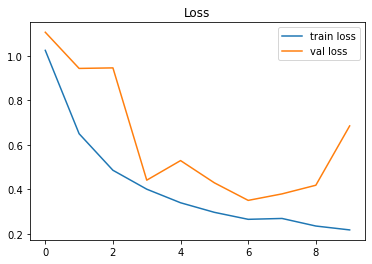

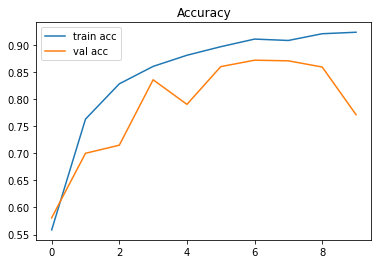

In [ ]:
plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(cnn_history.history['accuracy'], label='train acc')
plt.plot(cnn_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

# Evaluation

In [ ]:
cnn_evaluate = model.evaluate(test_set)

132/132 [==============================] - 56s 425ms/step - loss: 0.6884 - accuracy: 0.7761


In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)

test_labels = test_set.labels

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

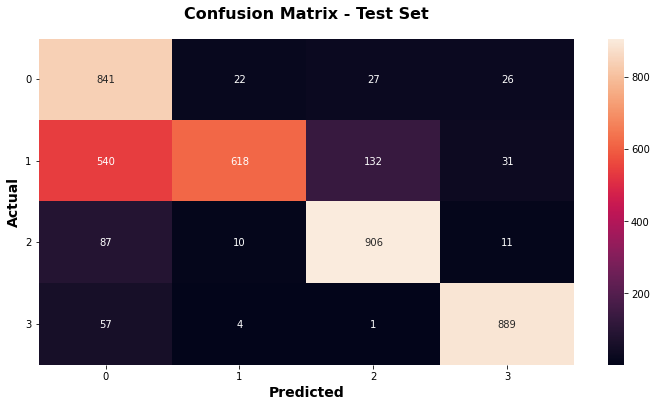

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.55      0.92      0.69       916
           1       0.94      0.47      0.63      1321
           2       0.85      0.89      0.87      1014
           3       0.93      0.93      0.93       951

    accuracy                           0.77      4202
   macro avg       0.82      0.80      0.78      4202
weighted avg       0.83      0.77      0.77      4202



## Proposed Model Inceptioin V3 + FC Layer

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception = InceptionV3(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))

for layer in inception.layers:
    layer.trainable = False


model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(48,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 128)               6553728   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 48)                6192      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1

In [ ]:
inception_history = model.fit(train_set,epochs=10,validation_data=test_set)

Epoch 1/10
307/307 [==============================] - 172s 561ms/step - loss: 0.1696 - accuracy: 0.9882 - val_loss: 1.1309 - val_accuracy: 0.9446
Epoch 2/10
307/307 [==============================] - 170s 555ms/step - loss: 0.1514 - accuracy: 0.9899 - val_loss: 4.2339 - val_accuracy: 0.8663
Epoch 3/10
307/307 [==============================] - 170s 553ms/step - loss: 0.1438 - accuracy: 0.9925 - val_loss: 0.8617 - val_accuracy: 0.9562
Epoch 4/10
307/307 [==============================] - 169s 549ms/step - loss: 0.1166 - accuracy: 0.9924 - val_loss: 1.6127 - val_accuracy: 0.9417
Epoch 5/10
307/307 [==============================] - 170s 554ms/step - loss: 0.1874 - accuracy: 0.9908 - val_loss: 0.5902 - val_accuracy: 0.9748
Epoch 6/10
307/307 [==============================] - 170s 554ms/step - loss: 0.2041 - accuracy: 0.9901 - val_loss: 0.6752 - val_accuracy: 0.9741
Epoch 7/10
307/307 [==============================] - 170s 553ms/step - loss: 0.1128 - accuracy: 0.9948 - val_loss: 0.7081 -

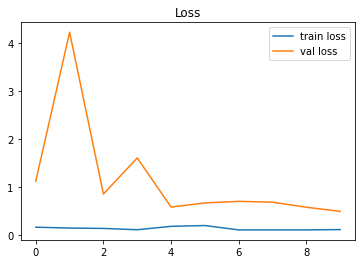

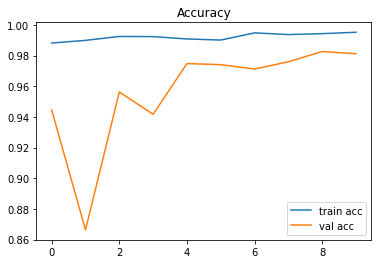

In [ ]:
plt.plot(inception_history.history['loss'], label='train loss')
plt.plot(inception_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(inception_history.history['accuracy'], label='train acc')
plt.plot(inception_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

# Evaluation

In [ ]:
inception_evaluate = model.evaluate(test_set)

132/132 [==============================] - 70s 527ms/step - loss: 0.6363 - accuracy: 0.9829


In [ ]:
inception_evaluate = model.evaluate(train_set)

307/307 [==============================] - 137s 444ms/step - loss: 0.0882 - accuracy: 0.9959


In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)

test_labels = test_set.labels

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

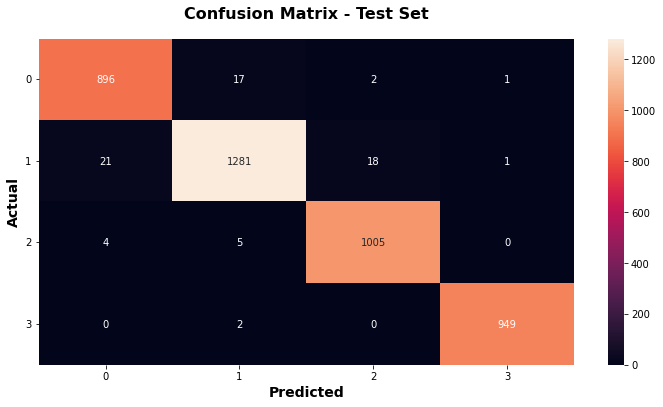

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

# comparison

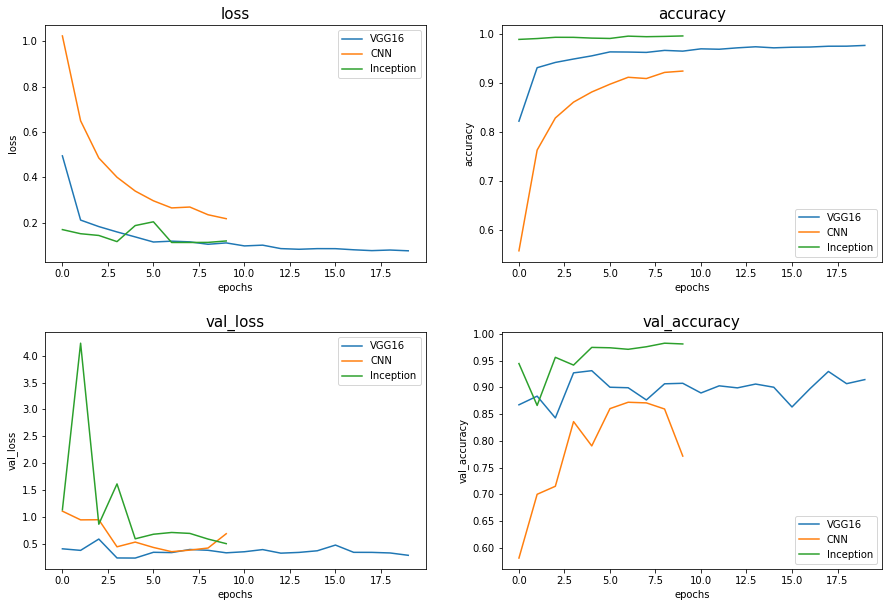

In [ ]:
model_hist = [vgg_history,cnn_history,inception_history]
names = ['VGG16','CNN','Inception']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in model_hist[0].history:
    index = list(model_hist[0].history).index(metric)
    ax = axes.flatten()[index]
    name_index = 0
    for history in model_hist:
        ax.plot(history.history[metric], label=names[name_index])
        name_index += 1
    ax.set_title(metric, size=15)
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.legend()
plt.show()